<a href="https://colab.research.google.com/github/shiitake-is-cool/shiitake/blob/main/MLtest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
X,y=make_blobs(
random_state=0,
n_features=2,
centers=2,
cluster_std=1,
n_samples=300)

In [2]:
import pandas as pd
df = pd.DataFrame(X)
df["target"]=y
df.head()

,0,1,target
0,3.359415,5.248267,0
1,2.931100,0.782556,1
2,1.120314,5.758061,0
3,2.876853,0.902956,1
4,1.666088,5.605634,0


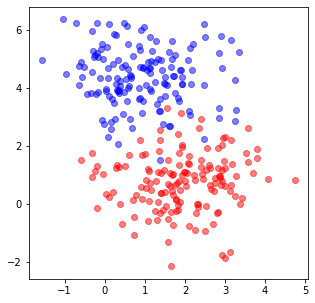

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

df0= df[df["target"]==0]
df1= df[df["target"]==1]
plt.figure(figsize=(5,5))
plt.scatter(df0[0],df0[1],color="b",alpha=0.5)
plt.scatter(df1[0],df1[1],color="r",alpha=0.5)
plt.show()

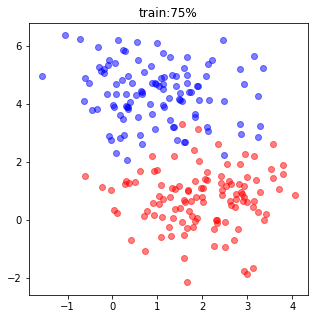

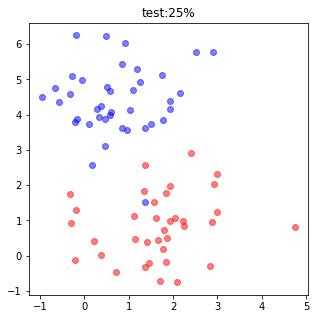

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

df = pd.DataFrame(X_train)
df["target"]= y_train
df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
plt.figure(figsize=(5,5))
plt.scatter(df0[0],df0[1],color="b",alpha=0.5)
plt.scatter(df1[0],df1[1],color="r",alpha=0.5)
plt.title("train:75%")
plt.show()

df = pd.DataFrame(X_test)
df["target"]= y_test
df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
plt.figure(figsize=(5,5))
plt.scatter(df0[0],df0[1],color="b",alpha=0.5)
plt.scatter(df1[0],df1[1],color="r",alpha=0.5)
plt.title("test:25%")
plt.show()

In [5]:
from sklearn import svm
model=svm.SVC()
model.fit(X_train,y_train)

SVC()

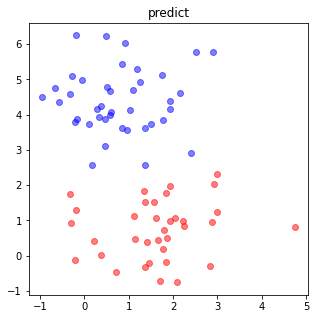

In [6]:
pred = model.predict(X_test)
# テスト用の特徴量(X_test)でデータフレームを作り、予測結果(pred)をtargetの列として追加
df = pd.DataFrame(X_test)
df["target"]=pred
df0=df[df["target"]==0]
df1=df[df["target"]==1]
plt.figure(figsize=(5,5))
plt.scatter(df0[0],df0[1],color="b",alpha=0.5)
plt.scatter(df1[0],df1[1],color="r",alpha=0.5)
plt.title("predict")
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
score=accuracy_score(y_test,pred)
print("正解率：",score*100,"%")

正解率： 96.0 %


In [8]:
pred = model.predict([[1,3]])
print("1,3=",pred)

pred = model.predict([[1,2]])
print("1,2=",pred)

1,3= [0]
1,2= [1]


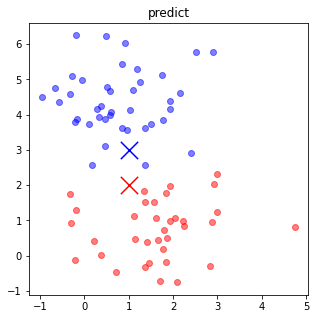

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(df0[0],df0[1],color="b",alpha=0.5)
plt.scatter(df1[0],df1[1],color="r",alpha=0.5)
plt.scatter([1],[3],color="b",marker="x",s=300)
plt.scatter([1],[2],color="r",marker="x",s=300)
plt.title("predict")
plt.show()

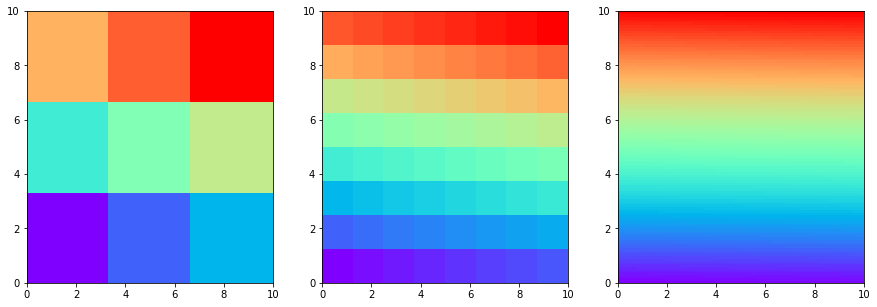

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize=(15,5))
sizelist = [3,8,100]
for i in range(3):
  size=sizelist[i]
  X,Y = np.meshgrid(np.linspace(0,10,size+1),np.linspace(0,10,size+1))
  C = np.linspace(0,100,size*size).reshape(size,size)
  plt.subplot(1,3,i+1)
  plt.pcolormesh(X,Y,C,cmap="rainbow")

plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 散布図に分類の状態を描画する関数
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    # 点と塗りのカラーマップ
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])

    plt.figure(figsize=(5, 5))
    # モデルがあれば、表示範囲の点をすべて予測して色を塗る
    if model:
        # 表示範囲を少し広げて分割し、調べる点（200x200）を用意する
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        # 全ての点の値を、モデルで予測する
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #　予測結果の値（0〜2）の色（cmap_fills）で塗りつぶす
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        #　境界を灰色で塗る
        plt.contour(XX, YY, pred, colors="gray") 
    #　targetの値（0〜2）の色（cmap_dots）で点を描画する
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

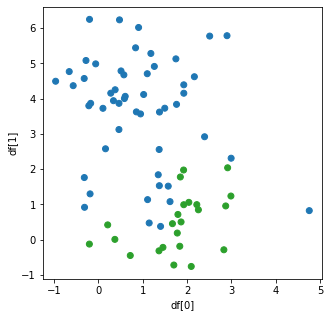

In [19]:
df=pd.DataFrame(X_test)
pred = model.predict(X_test)
plot_boundary(None,df[0],df[1],pred,"df[0]","df[1]")

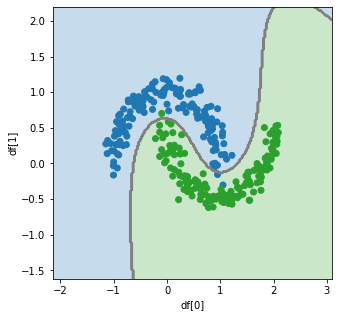

In [20]:
from sklearn.datasets import make_moons
X,y = make_moons(random_state=3,noise=0.1,n_samples=300)
df = pd.DataFrame(X)
model= svm.SVC()
model.fit(X,y)
plot_boundary(model,df[0],df[1],y,"df[0]","df[1]")